In [360]:
!pip install yfinance
#!pip install pandas
#!pip install requests
!pip install bs4
#!pip install plotly
!pip install html5lib
!pip install lxml
!pip install nbformat

In [361]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import display

In [362]:
def make_graph(stock_data,revenue_data,stock):
    fig=make_subplots(rows=2,cols=1,shared_xaxes=True,subplot_titles=("Historica; Share Price","Historical Revenue"), vertical_spacing= .3)
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data.Date,infer_datetime_format=True),y=stock_data.Close.astype("float"),name="Share Price"),row=1,col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data.Date,infer_datetime_format=True),y=revenue_data.Revenue.astype("float"),name="Revenue"),row=2,col=1)
    fig.update_xaxes(title_text="Date",row=1,col=1)
    fig.update_xaxes(title_text="Date",row=2,col=1)
    fig.update_yaxes(title_text="Price ($US)",row=1,col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)",row=2,col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

__Question 1__

__Using yfinance to Extract Tesla Historical Stock Data__

Let's use the Ticker function to build a ticker object by entering the ticker symbol of the stock from which we wish to collect data.Tesla is the company's data.Tesla is the company's stock,and TSLA is its ticker.

In [363]:
tesla=yf.Ticker("TSLA")

Stock data will be extracted and saved in a dataframe called tesla_data using the ticker object and the function history. To obtain data for the longest possible period of time,we shall set the period option to max.

In [364]:
tesla_data=tesla.history(period="max")

The first five rows of the tesla_data dataframe will be displayed after we reset the index on the dataframe.

In [365]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


__Question 2__

__Using Webscraping to Extract Tesla Revenue Data__

Using the requests library to download the webpage
https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.html
and save the text of the response as a variable named html_data.

In [366]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.html"
html_data=requests.get(url).text

We will parse the html data using beautiful soup

In [367]:
soup=BeautifulSoup(html_data,"html.parser")
soup.find_all('title')

C:\Users\Admin\AppData\Local\Programs\Python\Python312\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning:

It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.



[]

Using BeautifulSoup function,we will extract the table with Tesla Quarterly Revenue and store it into a dataframe named tesla_revenue showing the first 5 rows and removing the comma and dollar sign from the Revenue column.

In [368]:
tesla_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text.replace('$','').replace('$','')
    
    tesla_revenue=tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True) 

Execute the following line to remove the comma and dollar sign from the revenue column

In [369]:
tesla_revenue['Revenue']=tesla_revenue['Revenue'].str.replace(',|\$',"")

Executing the following lines to remove null or empty strings in the Revenue column.

In [370]:
tesla_revenue.dropna(inplace=True)
tesla_revenue=tesla_revenue[tesla_revenue['Revenue']!=""]

Displaying the last 5 row of the tesla_revenue dataframe using the tail function

In [371]:
tesla_revenue.tail()

,Date,Revenue


__Question 3__

__Using yfinance to Extract GameStop Historical Stock Data__

Again,let's use the Ticker function to enter the ticker symbol of GameStop and its ticker symbol is GME.

In [372]:
gamestop=yf.Ticker("GME")

Let's extract and save the gamestop data into a dataframe called gme_data using the ticker object and function history

In [373]:
gme_data=gamestop.history(period="max")

As before,we will reset the index on the gamestop dataframe and display the first five rows

In [374]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


__Question 4__

__Using Webscraping to Extract GameStop Revenue Data__

Using the requests library to download the webpage 
https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue
and save the text of the response as a variable named html_data.

In [375]:
url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(url).text

Now we will Parse the html data using beautiful soup

In [376]:
soup=BeautifulSoup(html_data,"html.parser")
soup.find_all('title')

[]

Using `BeautifulSoup`function, we will extract the table with `GameStop Quarterly Revenue and store it into a dataframe named `gme_revenue` while removing the comma and dollar sign from the Revenue column.

In [377]:
gme_revenue=pd.DataFrame(columns=['Date','Revenue'])
for row in soup.find_all('tr'):
    col=row.find_all('td')
    date=col[0].text
    revenue=col[1].text.replace('$','').replace('$','')
            
    gme_revenue=gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

Again,Executing the following lines to remove null or empty strings in the Revenue column.

In [378]:
tesla_revenue.dropna(inplace=True)
tesla_revenue=tesla_revenue[tesla_revenue['Revenue']!=""]
gme_revenue.tail()

,Date,Revenue


__Question 5__

Use the `make_graph` function to graph the Tesla Stock Data,also provide a title for the graph.The structure to call the `make_graph` function is `make_graph(tesla_data,tesla_revenue,'Tesla')`.Note the graph will only show the data upto June 2021.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12572\3082229895.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12572\3082229895.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



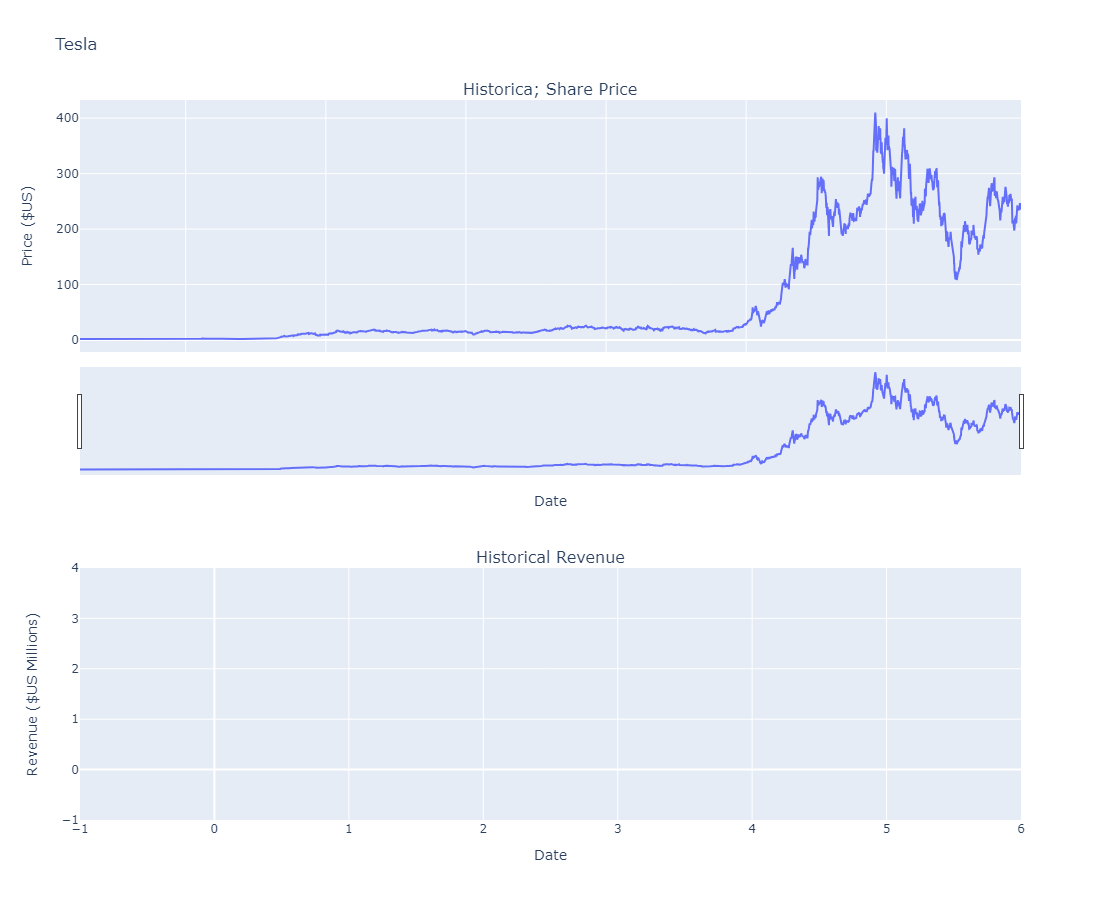

In [358]:
make_graph(tesla_data, tesla_revenue,'Tesla')

__Question 6__

Use the `make_graph` function to graph the GameStop Stock Data,also provide a title for the  graph. The structure to call the `make_graph` function is `make_graph(gme_data,gme_revenue,'GameStop').Note the graph will only show data upto June 2021.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12572\3082229895.py:3: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.

C:\Users\Admin\AppData\Local\Temp\ipykernel_12572\3082229895.py:4: UserWarning:

The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.



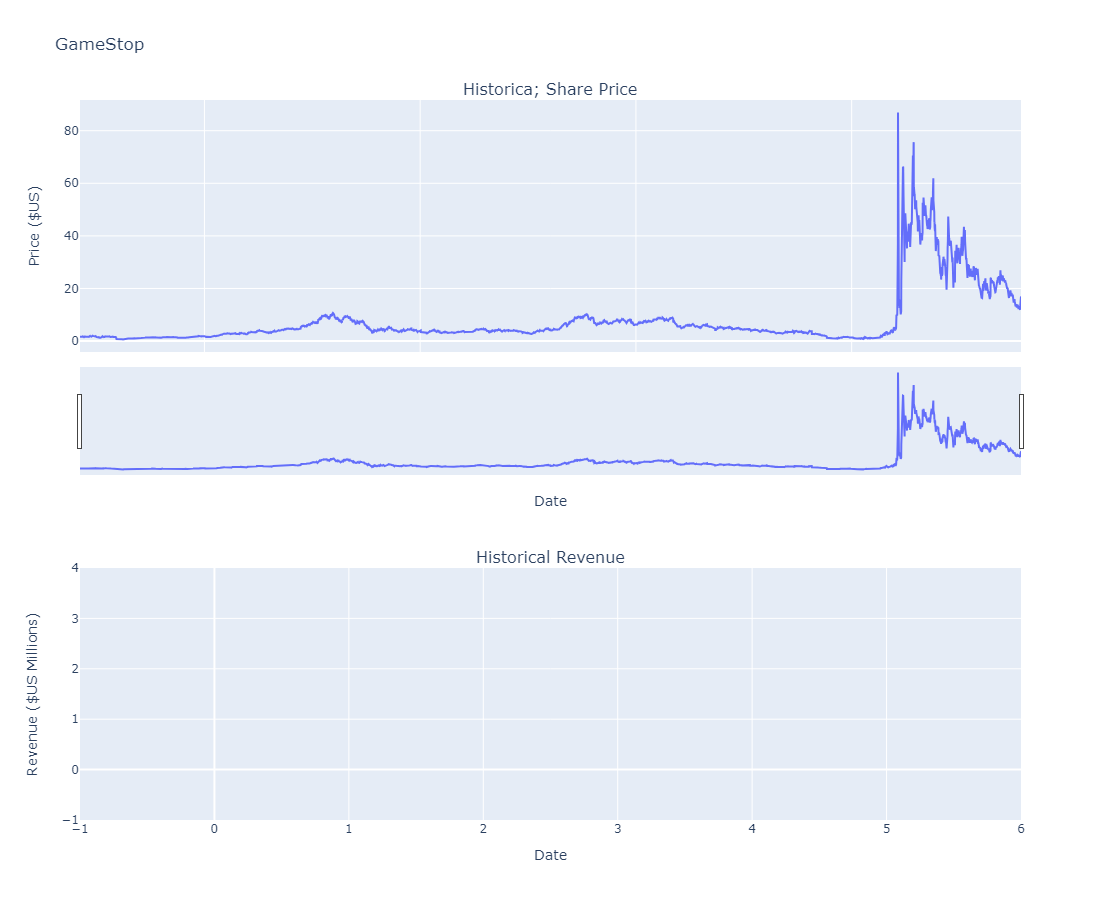

In [359]:
make_graph(gme_data,gme_revenue,'GameStop')